# U.S. Medical Insurance Costs

## Introduction

## Data Preparation

In [97]:
# All of our import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
# Read our insurance data into a data frame
insurance_df = pd.read_csv('insurance.csv')

# Print a sample of our insurance data
print(insurance_df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


## Feature Analysis

### Age

#### Age Distribution Across Regions in Our Data

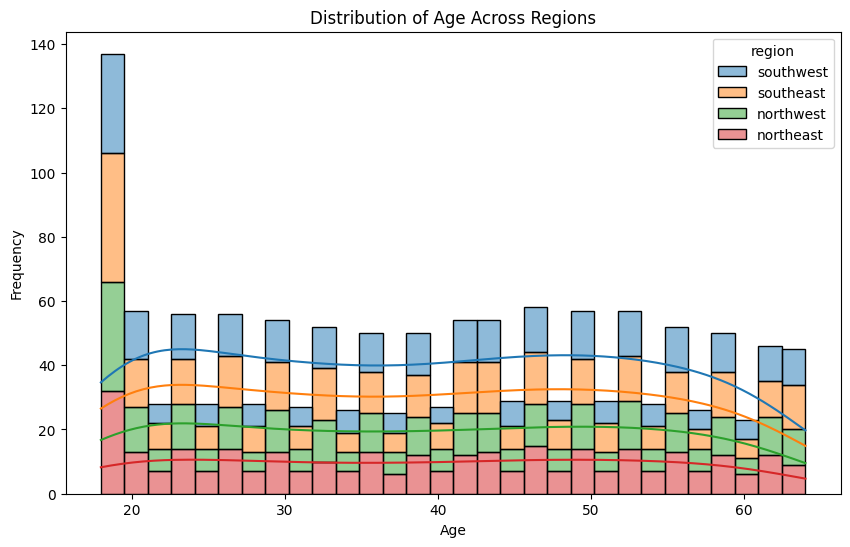

In [99]:
plt.figure(figsize=(10, 6))
sns.histplot(insurance_df, x='age', bins=30, kde=True, hue='region', multiple='stack')
plt.title('Distribution of Age Across Regions')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Average and Median Age in Our Data

In [100]:
# Calculates and returns the average age as a float value from the provided dataframe
def find_average_age(data):
    return data['age'].mean()

def find_median_age(data):
    return data['age'].median()

In [101]:
average_age = find_average_age(insurance_df)
median_age = find_median_age(insurance_df)
print(f"In our dataset, the average age is {average_age} while the median age is {median_age}")

In our dataset, the average age is 39.20702541106129 while the median age is 39.0


#### Relationship between Age and Smoking Behavior

In [102]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, float('inf')]
labels = ['<20', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90+']
insurance_df['age_group'] = pd.cut(insurance_df['age'], bins=bins, labels=labels, right=False)

# Calculate the percentage of smokers and non-smokers for each age group
age_group_smoking_percentage = insurance_df.groupby(['age_group', 'smoker']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

# Print the resulting dataframe
print(age_group_smoking_percentage)

smoker           no       yes
age_group                    
<20        0.781022  0.218978
20s        0.800000  0.200000
30s        0.774319  0.225681
40s        0.777778  0.222222
50s        0.848708  0.151292
60s        0.763158  0.236842
70s             NaN       NaN
80s             NaN       NaN
90+             NaN       NaN


/tmp/ipykernel_13467/3887997275.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_smoking_percentage = insurance_df.groupby(['age_group', 'smoker']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)


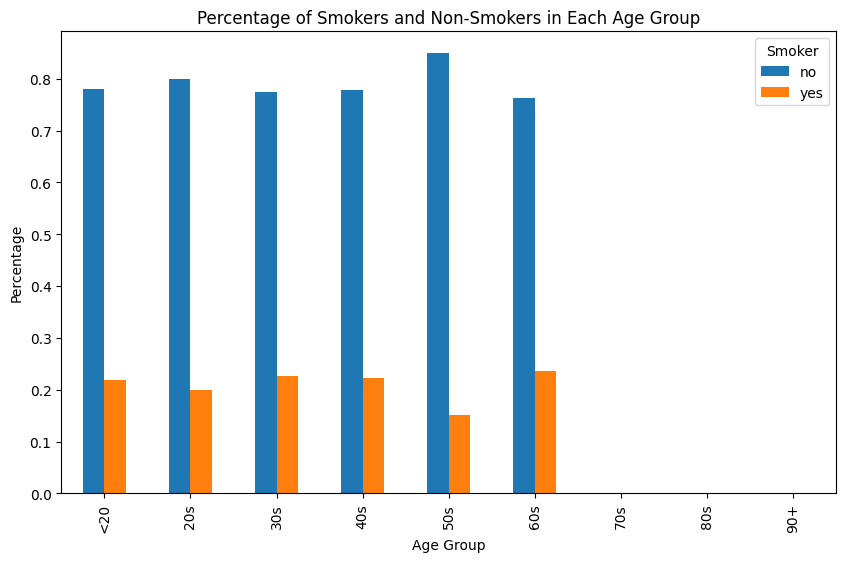

In [103]:
age_group_smoking_percentage.plot(kind='bar', figsize=(10, 6))
plt.title('Percentage of Smokers and Non-Smokers in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Smoker')
plt.show()

#### Impact of Age on BMI
<p><b>Note:</b> BMI is not necessarily an accurate predictor of health due to it reducing complex phenomena to a single number. Insurance companies use this BMI in their calculations, hence why we will use it in parts of our analysis, but would like to be clear of the skepticism around its relevance to our data and findings</p>

##### Distribution of BMI Across Age Groups

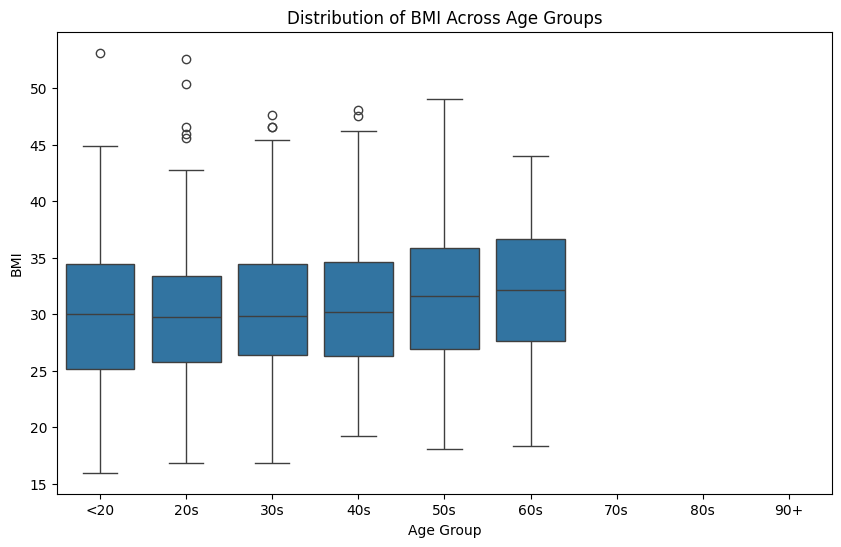

In [104]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='bmi', data=insurance_df)
plt.title('Distribution of BMI Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('BMI')
plt.show()

### Geographical

##### Distribution of Data by Region

In [105]:
region_percentage = insurance_df['region'].value_counts(normalize=True).reset_index()
region_percentage.columns = ['region', 'percentage']
print(region_percentage)

      region  percentage
0  southeast    0.272048
1  southwest    0.242900
2  northwest    0.242900
3  northeast    0.242152


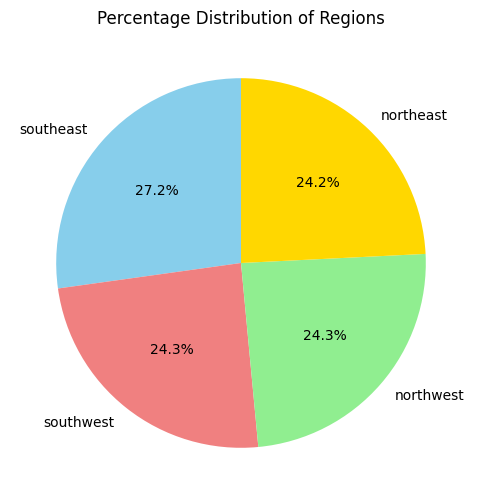

In [106]:
plt.figure(figsize=(6, 6))
plt.pie(region_percentage['percentage'], labels=region_percentage['region'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Percentage Distribution of Regions')
plt.show()

##### Average Insurance Cost Across Regions

In [107]:
average_cost_across_regions = insurance_df.groupby('region')['charges'].mean().reset_index()
average_cost_across_regions['Average Cost'] = average_cost_across_regions['charges'].round(2)
average_cost_across_regions = average_cost_across_regions[['region', 'Average Cost']]
print(average_cost_across_regions)

      region  Average Cost
0  northeast      13406.38
1  northwest      12417.58
2  southeast      14735.41
3  southwest      12346.94


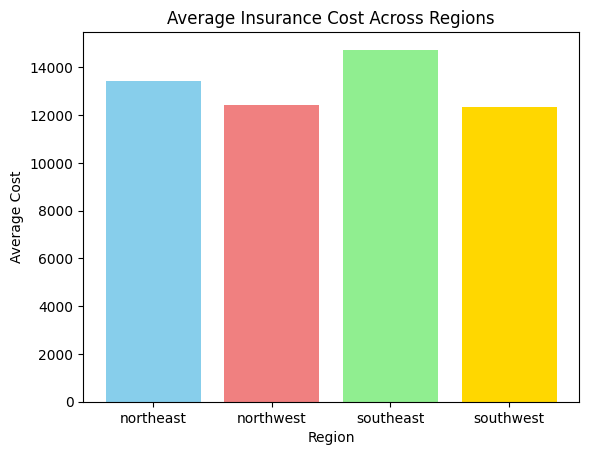

In [108]:
plt.bar(average_cost_across_regions['region'], average_cost_across_regions['Average Cost'], color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel('Region')
plt.ylabel('Average Cost')
plt.title('Average Insurance Cost Across Regions')
plt.show()

### Smokers vs. Non-Smokers

##### Percentage of Smokers and Non-Smokers

In [109]:
smoker_percentage = insurance_df['smoker'].value_counts(normalize=True).reset_index()
smoker_percentage.columns = ['smoker', 'percentage']
print(smoker_percentage)

  smoker  percentage
0     no    0.795217
1    yes    0.204783


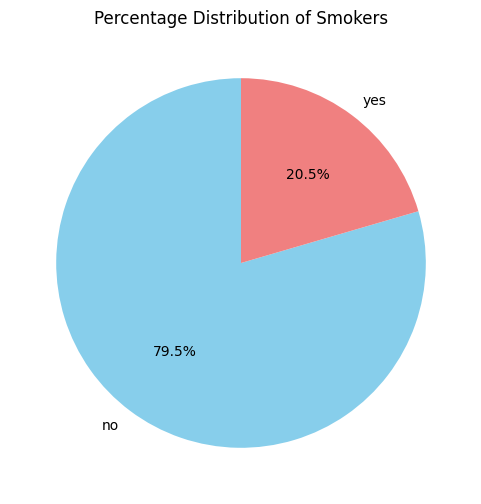

In [110]:
plt.figure(figsize=(6, 6))
plt.pie(smoker_percentage['percentage'], labels=smoker_percentage['smoker'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Percentage Distribution of Smokers')
plt.show()

##### Relationship Between Smoking and BMI

In [111]:
mean_bmi_smoker = insurance_df[insurance_df['smoker'] == 'yes']['bmi'].mean()
mean_bmi_non_smoker = insurance_df[insurance_df['smoker'] == 'no']['bmi'].mean()
correlation = insurance_df[['bmi', 'smoker']].replace({'yes': 1, 'no': 0}).corr().iloc[0, 1]

print(f"Mean BMI for Smokers: {mean_bmi_smoker:.2f}")
print(f"Mean BMI for Non-Smokers: {mean_bmi_non_smoker:.2f}")
print(f"Correlation between BMI and Smoking: {correlation:.2f}")

Mean BMI for Smokers: 30.71
Mean BMI for Non-Smokers: 30.65
Correlation between BMI and Smoking: 0.00


### Parents vs. Non-Parents

##### Average Amount of Children per Person

In [112]:
average_amount_children = insurance_df['children'].mean().round(2)
print(average_amount_children)

1.09


##### Distribution of Parents vs. Non-Parents

In [113]:
# Helper function for determining whether or not someone in our data is a parent during selection
def categorize_parental_status(num_children):
    if num_children > 0:
        return 'Parent'
    else:
        return 'Non-Parent'
    
new_df = insurance_df.assign(parental_status=insurance_df['children'].apply(categorize_parental_status))
parental_percentage = new_df['parental_status'].value_counts(normalize=True).reset_index()
parental_percentage.columns = ['parental_status', 'percentage']

print(parental_percentage)

  parental_status  percentage
0          Parent    0.571001
1      Non-Parent    0.428999


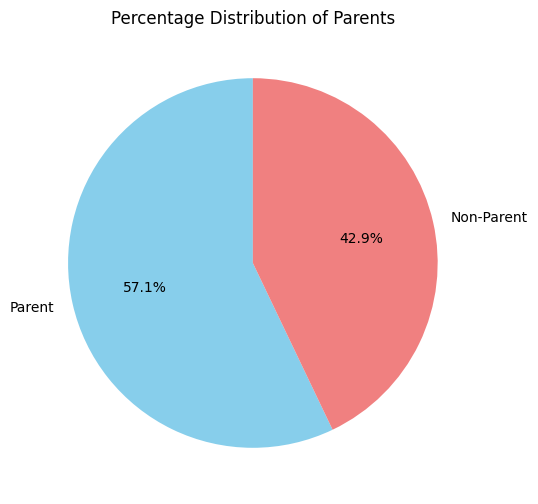

In [114]:
plt.figure(figsize=(6, 6))
plt.pie(parental_percentage['percentage'], labels=parental_percentage['parental_status'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Percentage Distribution of Parents')
plt.show()

##### Parental Age Distribution

In [125]:
parental_age = new_df.groupby('age_group')['parental_status'].count().reset_index()
parental_age.columns = ['age_group', 'total_parents']
print(parental_age)

  age_group  total_parents
0       <20            137
1       20s            280
2       30s            257
3       40s            279
4       50s            271
5       60s            114
6       70s              0
7       80s              0
8       90+              0


/tmp/ipykernel_13467/1990290431.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  parental_age = new_df.groupby('age_group')['parental_status'].count().reset_index()


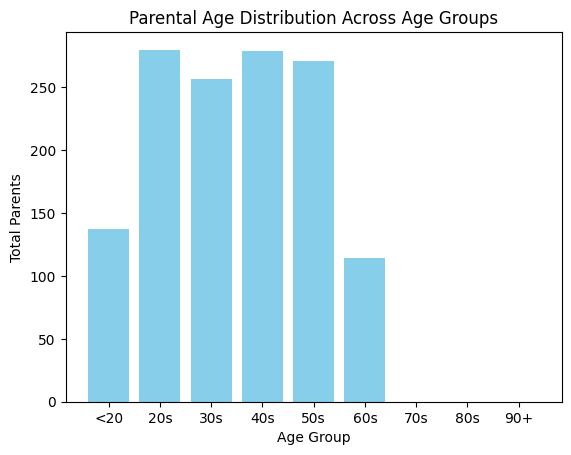

In [129]:
plt.bar(parental_age['age_group'], parental_age['total_parents'], color='skyblue')

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Total Parents')
plt.title('Parental Age Distribution Across Age Groups')

# Show the plot
plt.show()

##### Relationship Between Parenthood and Smoking Habits

In [127]:
parent_smoking_relationship = pd.crosstab(new_df['parental_status'], new_df['smoker'])
print(parent_smoking_relationship)

smoker            no  yes
parental_status          
Non-Parent       459  115
Parent           605  159


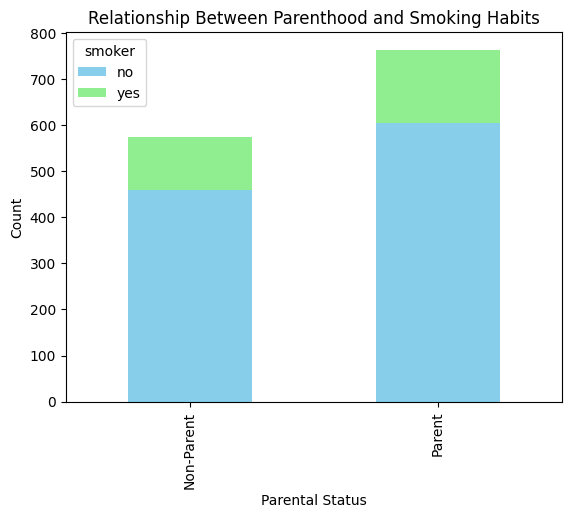

In [131]:
parent_smoking_relationship.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'])

# Add labels and title
plt.xlabel('Parental Status')
plt.ylabel('Count')
plt.title('Relationship Between Parenthood and Smoking Habits')

# Show the plot
plt.show()

### BMI

##### BMI Average Across Age Groups

In [116]:
# Calculate the average BMI for each age group
average_bmi_by_age_group = insurance_df.groupby('age_group')['bmi'].mean().reset_index()

# Print the resulting DataFrame
print(average_bmi_by_age_group)

  age_group        bmi
0       <20  29.971496
1       20s  29.786964
2       30s  30.443833
3       40s  30.709642
4       50s  31.510203
5       60s  32.016316
6       70s        NaN
7       80s        NaN
8       90+        NaN


/tmp/ipykernel_13467/4177249569.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_bmi_by_age_group = insurance_df.groupby('age_group')['bmi'].mean().reset_index()


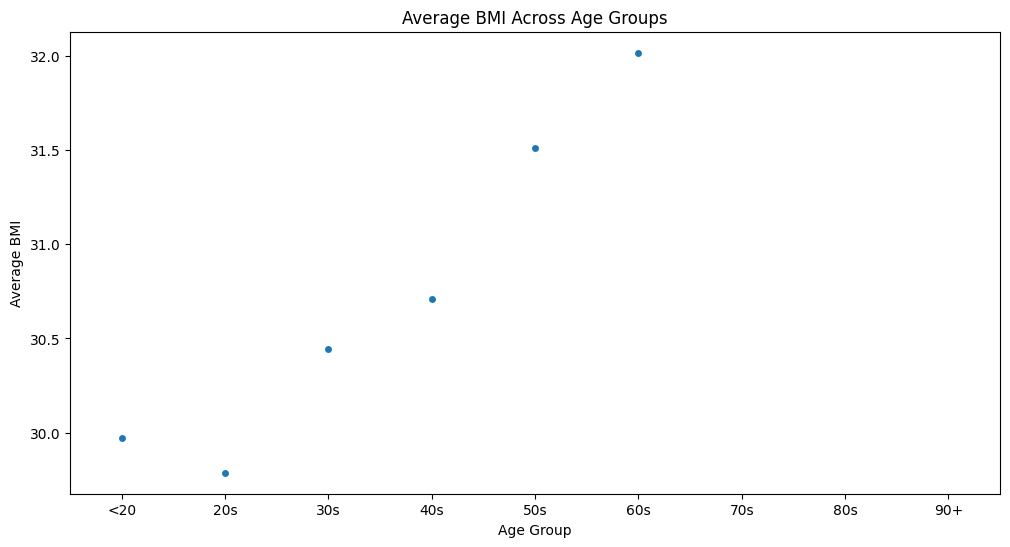

In [117]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='age_group', y='bmi', data=average_bmi_by_age_group, size=5)
plt.title('Average BMI Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average BMI')
plt.show()

### Gender
<p><b>Note:</b> Our provided insurance dataset does not take into account trans and non-binary individuals, which should be kept in mind while viewing the data and drawing conclusions.</p>

##### Gender Distribution in our Data

In [152]:
gender_distribution = insurance_df.groupby('sex').size().reset_index(name='total')
gender_distribution['percentage'] = (gender_distribution['total'] / gender_distribution['total'].sum()) * 100

print(gender_distribution)

      sex  total  percentage
0  female    662   49.476831
1    male    676   50.523169


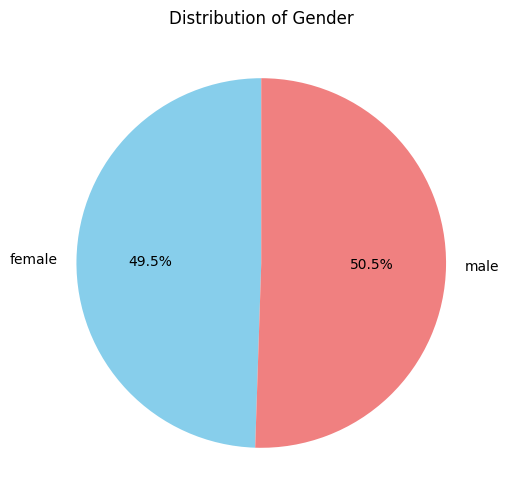

In [153]:
plt.figure(figsize=(6, 6))
plt.pie(gender_distribution['percentage'], labels=gender_distribution['sex'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Gender')
plt.show()

##### Relationship Between Gender and BMI

In [154]:
gender_bmi_relationship = insurance_df.groupby('sex')['bmi'].mean().reset_index()

print(gender_bmi_relationship)

      sex        bmi
0  female  30.377749
1    male  30.943129


## Insurance Cost Analysis

##### Relationship Between Age and Insurance Cost

##### Relationship Between Geographical Location and Insurance Cost

##### Relationship Between Smoking and Insurance Cost

##### Relationship Between Having Children and Insurance Cost

##### Relationship Between BMI and Insurance Cost

##### Relationship Between Gender and Insurance Cost